# **MODELA Y SIMULACION**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

la ecuacion a modelar **ecuación del movimiento de un vehículo afectado por la resistencia aerodinámica y la gravedad**. Esta resistencia aerodinámica es proporcional al cuadrado de la velocidad del objeto en movimiento. 

La ecuación se puede expresar como:

$$m \frac{dv}{dt} = F_{\text{motor}} - F_{\text{resistencia aerodinámica}} - F_{\text{gravedad}}$$


### Términos de la ecuación:
1. **\( $m \frac{dv}{dt}$ \)**: Representa la variación de la cantidad de movimiento del objeto (masa \( m \) y aceleración \( a = \frac{dv}{dt} \)).

2. **\( $F_{\text{motor}}$ \)**: Fuerza aplicada por el motor para mover el objeto.

3. **\($F_{\text{resistencia aerodinámica}} = \frac{1}{2} C_d \rho A v^2 $ \)**:

   - \( $C_d$ \): Coeficiente de arrastre aerodinámico.
   - \( $\rho$ \): Densidad del aire.
   - \( A \): Área frontal del objeto.
   - \( v \): Velocidad del objeto.
4. **\( $ F_{\text{gravedad}} = m g \sin(\theta)$  \)**: Componente de la fuerza gravitacional a lo largo de una pendiente inclinada \( \theta \).

### Sustituyendo:
\[
$m \frac{dv}{dt} = F_{\text{motor}} - \frac{1}{2} C_d \rho A v^2 - m g \sin(\theta)$
\]

Si el vehículo está en una superficie plana (\( $\theta = 0$ \)) y no hay fuerza del motor (\($ F_{\text{motor}} = 0$ \)), la ecuación se reduce a:

\[
$m \frac{dv}{dt} = - \frac{1}{2} C_d \rho A v^2$\]

### Solución simplificada:
Dividiendo por \( m \) y reordenando:


$$\frac{dv}{dt} = - \frac{C_d \rho A}{2m} v^2$$

Esta es la ecuacion que describe cómo la velocidad $v(t)$ disminuye con el tiempo debido a la resistencia aerodinámica.

## **Aplicacion Real**:


En este caso se va tomar los valores reales de los que pasa en  a un  formula 1 en una carrea real en una recta que va por un tiempo y velocidad en especifico.

- **Coeficiente de arrastre aerodinámico ($C_d$)**= $0.7$ (más alto que un automóvil normal debido a la carga aerodinámica).


- **Densidad del aire ($\rho$)**= $1.225$, $\text{kg/m}^3$ (a nivel del mar).  


- **Área frontal ($A$)**= $1.5$ $\text{m}^2$ 


- **Masa del coche ($m$)**= $800$ $\text{kg}$ (incluyendo al piloto).  


- **Velocidad inicial ($v_0$)**: $80  \text{m/s}$ (equivalente a $ 288  \text{km/h}$.)



La ecuación es:  

$$ \frac{dv}{dt} = - \frac{C_d \rho A}{2m} v^2 $$


### Cálculo del coeficiente (\(k\)):

$$k = \frac{C_d \rho A}{2m}$$

Sustituyendo los valores:  

$$k = \frac{0.7 \cdot 1.225 \cdot 1.5}{2 \cdot 800}$$

Calculamos:  

$$k = \frac{1.28625}{1600} \approx 0.000804 \, \text{s}^{-1}.$$


La ecuación queda:  

$$\frac{dv}{dt} = - 0.000804 v^2$$


### Resolución de la ecuación:
Es una ecuación diferencial separable:

$$\frac{dv}{v^2} = -0.000804 \, dt$$


Integrando ambos lados:  

$$-\frac{1}{v} = -0.000804 t + C$$


Usamos la condición inicial $v(0) = v_0 = 80 \, \text{m/s}$ para encontrar \(C\):  

$$ -\frac{1}{80} = C $$


La solución general es:  

$$ -\frac{1}{v} = -0.000804 t - \frac{1}{80} $$


Simplificando:  

$$ v(t) = \frac{1}{0.000804 t + \frac{1}{80}}$$


### Evaluación numérica:
Supongamos que queremos calcular \(v(t)\) después de \(t = 5 \, \text{s}\):  

$$ v(5) = \frac{1}{0.000804 \cdot 5 + \frac{1}{80}}$$


Primero, calculamos el denominador:  

$$ 0.000804 \cdot 5 = 0.00402, \quad \frac{1}{80} = 0.0125 $$

$$0.00402 + 0.0125 = 0.01652$$


Finalmente:

$$ v(5) = \frac{1}{0.01652} \approx 60.54 \, \text{m/s}.$$


### Interpretación:
Después de 5 segundos, debido a la resistencia aerodinámica, la velocidad del coche de Fórmula 1 se reduce a aproximadamente $60.54 \text{m/s}$ equivalente a $217.94 \, \text{km/h}$.

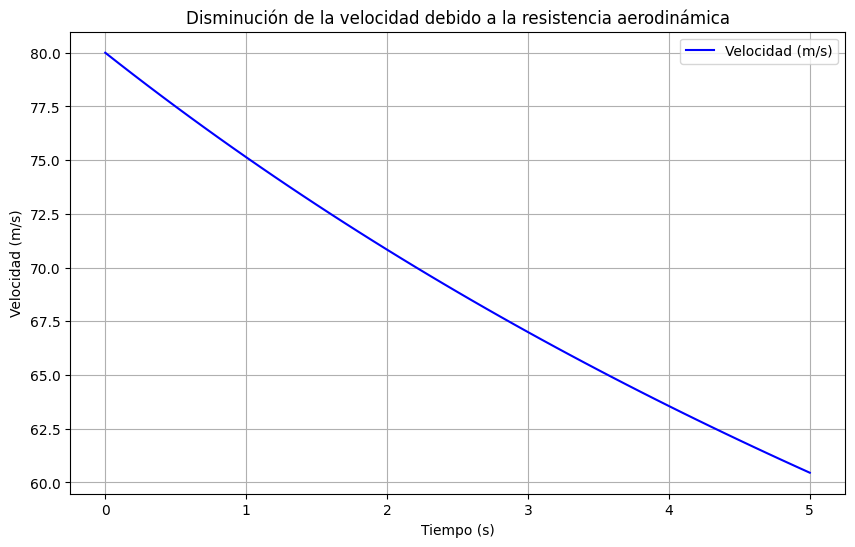

In [3]:
from sympy import pi
import matplotlib.pyplot as plt
import numpy as np

# Método para un paso de Euler
def step_euler(y, h, f):
    next_y = y + h * f(y)
    return next_y

# Método de Euler completo
def euler(h, f, y_0, start_t, end_t):
    N = int((end_t - start_t) / h)
    t_list = np.linspace(start_t, end_t, N + 1)
    y_list = np.zeros(N + 1)
    y_list[0] = y_0
    for i in range(0, N):
        y_list[i + 1] = step_euler(y_list[i], h, f)
    return t_list, y_list

# Parámetros para un coche de Fórmula 1
C_d = 0.7  # Coeficiente de arrastre
rho = 1.225  # Densidad del aire (kg/m^3)
A = 1.5  # Área frontal (m^2)
m = 800  # Masa (kg)
v_0 = 80  # Velocidad inicial (m/s)

# Constante k
k = (C_d * rho * A) / (2 * m)

# Definimos la ecuación diferencial dv/dt = -k * v^2
def dv_dt(v):
    return -k * v**2

# Intervalo de tiempo y paso
start_t = 0
end_t = 5
h = 0.1  # Paso de tiempo

# Resolución numérica usando Euler
t_vals, v_vals = euler(h, dv_dt, v_0, start_t, end_t)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(t_vals, v_vals, label="Velocidad (m/s)", color="blue")
plt.title("Disminución de la velocidad debido a la resistencia aerodinámica")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.grid(True)
plt.legend()
plt.show()


### **2. Análisis Cualitativo del Modelo**

#### **Conjuntos límite y equilibrios**
- La ecuación es autónoma: $ \frac{dv}{dt} = f(v) , donde f(v) = -k v^2$.
- El único punto de equilibrio es $v = 0$, ya que $f(v) = 0$ únicamente cuando $v = 0$.

#### **Estabilidad del equilibrio**
El signo de $f(v)$ determina el comportamiento de $v(t)$:
- Para $v > 0$, $f(v) < 0$, por lo que $v(t)$ disminuye con el tiempo.
- Para $v < 0$, $f(v) > 0$, pero esta región no es físicamente relevante (velocidad negativa no aplica aquí).

Por lo tanto, \(v = 0\) es un **punto de equilibrio asintóticamente estable**, ya que la velocidad converge a este valor con el tiempo.

#### **Solución explícita**
La solución general fue obtenida previamente:

$v(t) = \frac{1}{k t + \frac{1}{v_0}}$,

donde $v_0 = 80 \, \text{m/s}$ y $k = 0.000804 \, \text{s}^{-1}$.

- A medida que t \to \infty$, $v(t) \to 0$, confirmando el comportamiento límite hacia el equilibrio.


## **Analisis Numerico**

Gráfica  $v(t)$ para $t \in [0, 50]$:


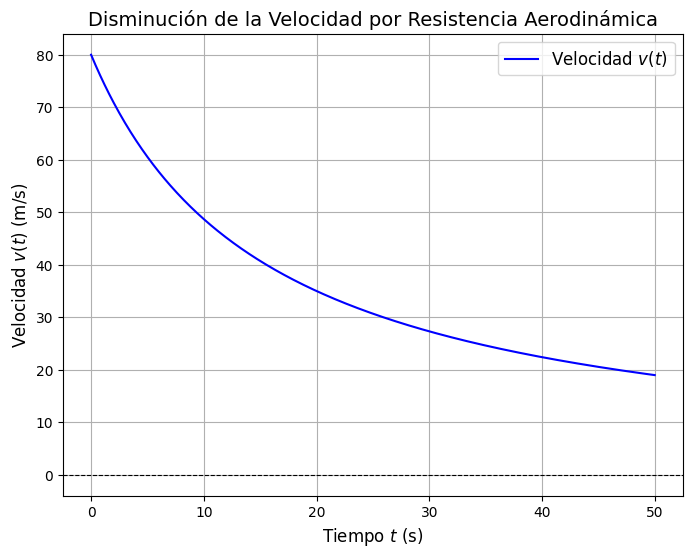

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
k = 0.000804  # Constante
v0 = 80  # Velocidad inicial (m/s)
t = np.linspace(0, 50, 500)  # Tiempo de simulación

# Solución explícita
v_t = 1 / (k * t + 1 / v0)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(t, v_t, label="Velocidad $v(t)$", color="blue")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.title("Disminución de la Velocidad por Resistencia Aerodinámica", fontsize=14)
plt.xlabel("Tiempo $t$ (s)", fontsize=12)
plt.ylabel("Velocidad $v(t)$ (m/s)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


## **Diagrama de bifurcaciones**
El modelo no presenta dependencias explícitas de parámetros variables aparte de $k$, pero si puede simular como afecta  $k$ en el tiempo asintótico $t \to \infty$.

Para distintos valores de $k$, graficamos las soluciones límite:

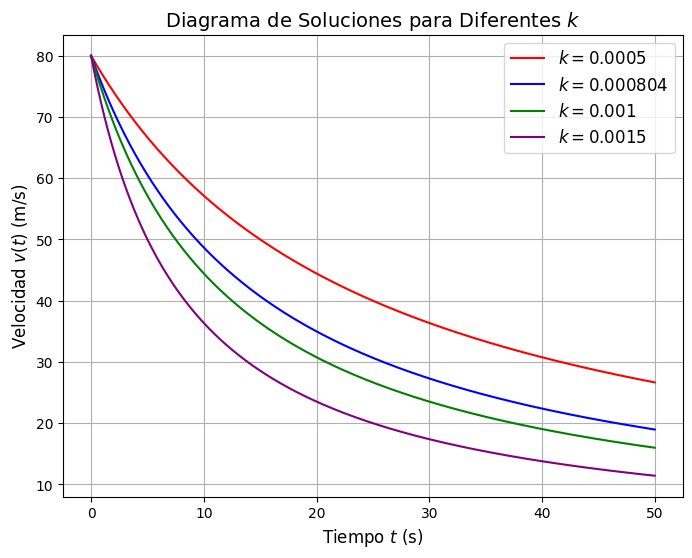

In [6]:
# Valores de k para el diagrama de bifurcaciones
k_values = [0.0005, 0.000804, 0.001, 0.0015]
colors = ['red', 'blue', 'green', 'purple']

plt.figure(figsize=(8, 6))
for i, k_val in enumerate(k_values):
    v_t = 1 / (k_val * t + 1 / v0)
    plt.plot(t, v_t, label=f"$k = {k_val}$", color=colors[i])

plt.title("Diagrama de Soluciones para Diferentes $k$", fontsize=14)
plt.xlabel("Tiempo $t$ (s)", fontsize=12)
plt.ylabel("Velocidad $v(t)$ (m/s)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


## **Diagrama de estabilidad puntos fijos estable y punto fijos  inestables**

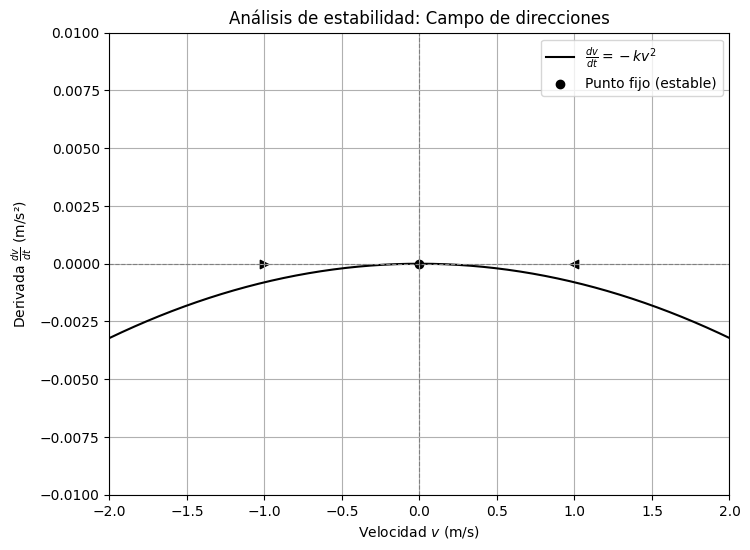

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
k = 0.000804  # Coeficiente positivo

# Rango de valores de velocidad (v)
v = np.linspace(-2, 2, 300)

# Derivada dv/dt
dv_dt = -k * v**2

# Crear gráfica
plt.figure(figsize=(8, 6))
plt.plot(v, dv_dt, color='black', label=r"$\frac{dv}{dt} = -k v^2$")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Línea de dv/dt = 0
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)  # Línea de velocidad v = 0

# Puntos destacados
plt.scatter(0, 0, color='black', marker='o', label="Punto fijo (estable)")

# Direcciones del flujo
plt.scatter(-1, 0, color='black', marker='>')  # Flecha hacia la derecha (v < 0)
plt.scatter(1, 0, color='black', marker='<')   # Flecha hacia la izquierda (v > 0)

# Configurar límites y etiquetas
plt.axis([-2, 2, -0.01, 0.01])
plt.grid(True)
plt.xlabel('Velocidad $v$ (m/s)')
plt.ylabel(r'Derivada $\frac{dv}{dt}$ (m/s²)')
plt.title("Análisis de estabilidad: Campo de direcciones")
plt.legend()
plt.show()
